# Econometrics Week 7 Case Project

| Name | Description | Date 
| :- |-------------: | :-:
|Thijs Meijerink| Econometrics| 28th of December 2022 |


## Questions
<ul>
<li><a href="#prep">Preparation</a></li>
<li><a href="#a">a</a></li>
<li><a href="#b">b</a></li>
<li><a href="#c">c</a></li>
<li><a href="#d">d</a></li>
<li><a href="#e">e</a></li>
<li><a href="#f">f</a></li>
<li><a href="#g">g</a></li>
</ul>


<a id='prep'></a>
## Preparation

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.tsa.stattools import adfuller
import statsmodels.stats.diagnostic as dg
import statsmodels.api as sm
import scipy

In [2]:
file_location="./Case_GDP-round2.xls"
data = pd.read_excel(file_location)
data['date'] = pd.PeriodIndex(data['Date'], freq='Q').to_timestamp()
data['li1min1']=data['li1'].shift(1)
data['li2min1']=data['li2'].shift(1)
data['li1min2']=data['li1'].shift(2)
data['li2min2']=data['li2'].shift(2)
data['GrowthRatemin1']=data['GrowthRate'].shift(1)
data.head() # sample data

,Date,GDP,GDPIMPR,LOGGDP,GrowthRate,li1,li2,T,date,li1min1,li2min1,li1min2,li2min2,GrowthRatemin1
0,1950Q1,94.300,NaN,4.546481,NaN,0,0,0,1950-01-01,NaN,NaN,NaN,NaN,NaN
1,1950Q2,95.200,1.0,4.555980,0.009499,0,0,1,1950-04-01,0.0,0.0,NaN,NaN,NaN
2,1950Q3,97.663,1.0,4.581523,0.025543,3,1,2,1950-07-01,0.0,0.0,0.0,0.0,0.009499
3,1950Q4,99.728,1.0,4.602446,0.020924,4,2,3,1950-10-01,3.0,1.0,0.0,0.0,0.025543
4,1951Q1,100.445,1.0,4.609610,0.007164,2,1,4,1951-01-01,4.0,2.0,3.0,1.0,0.020924


<a id='a'></a>
## a
The table below summarizes the outcomes of four logit models to explain the direction of economic development
(GDPIMPR) for the period 1951 to 2010. Perform three Likelihood Ratio tests to prove both the individual and
the joint significance of the 1-quarter lags of li1 and li2, where the alternative hypothesis is always the model
with both indicators included.

<img src="week7a.png" alt="Alternative text" />

In [3]:
#calculate likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(-149.521-(-134.1781))
print('li1 LR statistic: '+str(LR_statistic))
#calculate p-value of test statistic using 1 degrees of freedom
p_val = scipy.stats.chi2.sf(LR_statistic, 1)
print('critical value of LR statistic; '+str(p_val))
print("\n")

#calculate likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(-139.747-(-134.1781))
print('li2 LR statistic: '+str(LR_statistic))
#calculate p-value of test statistic using 1 degrees of freedom
p_val = scipy.stats.chi2.sf(LR_statistic, 1)
print('critical value of LR statistic; '+str(p_val))
print("\n")

#calculate likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(-152.763-(-134.1781))
print('li1,li2 LR statistic: '+str(LR_statistic))
#calculate p-value of test statistic using 2 degrees of freedom
p_val = scipy.stats.chi2.sf(LR_statistic, 2)
print('critical value of LR statistic; '+str(p_val))

li1 LR statistic: 30.685799999999972
critical value of LR statistic; 3.033771341804778e-08


li2 LR statistic: 11.137800000000027
critical value of LR statistic; 0.0008458615201582619


li1,li2 LR statistic: 37.16980000000001
critical value of LR statistic; 8.485559504584122e-09


#### Answer:
Concluding: all three are significant (critical value < 0.05)

<a id='b'></a>
## b
It could be that the leading indicators lead the economy by more than 1 quarter. The table below summarizes
outcomes of four logit models that differ in the lags of the indicators. For what reason can we use McFadden
R2 to select the best lag structure among these four models? Compute the four values of McFadden R2 (with
four decimals) and conclude which model is optimal according to this criterion.

<img src="week7b.png" alt="Alternative text" />

In [4]:
Model1=1-((-134.178)/(-152.763))
Model2=1-((-134.126)/(-152.763))
Model3=1-((-130.346)/(-152.763))
Model4=1-((-130.461)/(-152.763))
print('Model 1 McFadden R2= '+str(Model1))
print('Model 2 McFadden R2= '+str(Model2))
print('Model 3 McFadden R2= '+str(Model3))
print('Model 4 McFadden R2= '+str(Model4))

Model 1 McFadden R2= 0.12165904047446052
Model 2 McFadden R2= 0.12199943703645522
Model 3 McFadden R2= 0.1467436486583793
Model 4 McFadden R2= 0.14599084856935252


#### Answer:
McFadden R2 can be used because variables and amount of coefficients are the same

Model 3 performs best as R2 is highest, thus variables l1(-2) and l2(-1)

<a id='c'></a>
## c
Use the logit model 3 of part (b) (with li1(-2) and li2(-1)) to calculate the predicted probability of economic
growth for each of the 20 quarters of the evaluation sample. Assess the predictive performance by means of
the prediction-realization table and the hit rate, using a cut-off value of 0.5. Evaluate the outcomes.

In [5]:
subset=data[data['date']<'2011-01-01'].dropna(subset=['GDPIMPR','li2min1','li1min2'])
evalset=data[data['date']>'2011-01-01'].dropna(subset=['GDPIMPR','li2min1','li1min2'])

features = list(['li1min2','li2min1'])
logreg=LogisticRegression()
logreg.fit(subset[features],subset['GDPIMPR'])
predict=logreg.predict(evalset[features])
results=pd.DataFrame(evalset[['Date','GDPIMPR']])
score=logreg.score(subset[features],subset['GDPIMPR'])
results['predict']=predict.tolist()
print(results)
print("\n")
print('Score is: '+str(score))

       Date  GDPIMPR  predict
245  2011Q2      0.0      0.0
246  2011Q3      0.0      0.0
247  2011Q4      0.0      0.0
248  2012Q1      1.0      0.0
249  2012Q2      0.0      0.0
250  2012Q3      1.0      0.0
251  2012Q4      1.0      1.0
252  2013Q1      1.0      1.0
253  2013Q2      1.0      1.0
254  2013Q3      1.0      1.0
255  2013Q4      0.0      1.0
256  2014Q1      0.0      1.0
257  2014Q2      1.0      1.0
258  2014Q3      1.0      1.0
259  2014Q4      1.0      1.0
260  2015Q1      1.0      1.0
261  2015Q2      1.0      1.0
262  2015Q3      1.0      1.0
263  2015Q4      0.0      0.0


Score is: 0.6983471074380165


#### Answer:
Thus high performing at 69%

<a id='d'></a>
## d
Perform the Augmented Dickey-Fuller test on LOGGDP to confirm that this variable is not stationary. Use only
the data in the estimation sample and include constant, trend, and a single lag in the test equation (L = 1,
see Lecture 6.4). Present the coefficients of the test regression and the relevant test statistic, and state your
conclusion.

In [6]:
yt=subset[['LOGGDP']]
#perform augmented Dickey-Fuller test
result = adfuller(yt,maxlag=1, regression='ct')
fiveper=result[4].get('5%')
print(f'ADF t-stat: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
print(f'5% crit value: {fiveper}')

ADF t-stat: -2.3711639040112926
n_lags: 1
p-value: 0.3950570593438284
5% crit value: -3.4289434905960645


#### Answer:
t-stat > 5% critical value, thus H0 cannot be rejected. Thus LOGGDP is not stationary

<a id='e'></a>
## e
Consider the following model (see below). Here the numbers k1 and k2 denote the lag orders of the leading indicators. Estimate four versions of this model on the estimation sample from 1951 to 2010, by setting k1 and k2 equal to either 1 or 2. Show that the model with k1 = k2 = 1 gives the largest value for R2, and present the four coefficients of this model in six decimals.

<img src="week7e.png" alt="Alternative text" />

In [7]:
y=subset['GrowthRate']
X=subset[['GrowthRatemin1','li1min1','li2min1']]
X = sm.add_constant(X)

X2=subset[['GrowthRatemin1','li1min1','li2min2']]
X2= sm.add_constant(X2)

X3=subset[['GrowthRatemin1','li1min2','li2min1']]
X3= sm.add_constant(X3)

X4=subset[['GrowthRatemin1','li1min2','li2min2']]
X4= sm.add_constant(X4)

model1=sm.OLS(y,X)
res1=model1.fit()
Model1=res1.rsquared

model2=sm.OLS(y,X2)
res2=model2.fit()
Model2=res2.rsquared

model3=sm.OLS(y,X3)
res3=model3.fit()
Model3=res3.rsquared

model4=sm.OLS(y,X4)
res4=model4.fit()
Model4=res4.rsquared

print('Model 1 R2= '+str(Model1))
print('Model 2 R2= '+str(Model2))
print('Model 3 R2= '+str(Model3))
print('Model 4 R2= '+str(Model4))

Model 1 R2= 0.49918635522117827
Model 2 R2= 0.49899039095694164
Model 3 R2= 0.473348346417532
Model 4 R2= 0.4733228162782597


In [8]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:             GrowthRate   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     79.08
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           1.60e-35
Time:                        13:06:50   Log-Likelihood:                 976.09
No. Observations:                 242   AIC:                            -1944.
Df Residuals:                     238   BIC:                            -1930.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0017      0.000      5.

#### Answer:
Model 1 performs best as R2 is highest, thus variables l1(-1) and l2(-1). Coefficients are shown in OLS summary.

<a id='f'></a>
## f
Perform the Breusch-Godfrey test for first-order residual serial correlation for the model in part (e) with k1 =
k2 = 1. Does the test outcome signal misspecification of the model?

In [9]:
#perform Breusch-Godfrey test at order p = 3
bgtest=dg.acorr_breusch_godfrey(res1, nlags=1)
print('Breusch-Godfrey t-stat: '+str(bgtest[0]))
print('p-value: '+str(bgtest[1]))

Breusch-Godfrey t-stat: 0.2371931569085819
p-value: 0.6262407554272522


#### Answer:
t-stat > 5% critical value, thus H0 cannot be rejected. Thus no residual serial correlation

<a id='g'></a>
## g
Use the model in part (e) with k1 = k2 = 1 to generate a set of twenty one-step-ahead predictions for the
growth rates in each quarter of the period 2011 to 2015. Note that the required values of the lagged leading
indicators are available for each of these forecasts. Calculate the root mean squared error of these forecasts
and present a time series graph of the predictions and the actual growth rates.

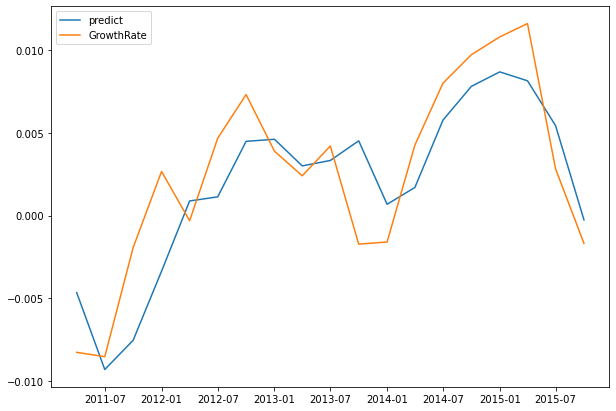

In [10]:
X=evalset[['GrowthRatemin1','li1min1','li2min1']]
X= sm.add_constant(X)
predict=res1.predict(X)
evalset['predict']=predict

# plot lines
plt.rcParams['figure.figsize'] = [10, 7]
plt.plot(evalset['date'], evalset['predict'], label = "predict")
plt.plot(evalset['date'], evalset['GrowthRate'], label = "GrowthRate")
plt.legend()
plt.show()

In [11]:
MSE = np.square(np.subtract(evalset['GrowthRate'],evalset['predict'])).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: "+str(RMSE))


Root Mean Square Error: 0.0031594865463873928
